# Data Augmentation

Apprendre à coder effecacement un réseau de neurones est l'une des étapes du développement de solutions performantes. De plus, pour développer de bonnes solutions d'apprentissage en profondeur, il est crucial de trouver un domaine d'intérêt dans lequel nous pouvons apporter une solution à un défi actuel. Mais une fois que tout cela est fait, nous sommes généralement confrontés au même problème : obtenir un ensemble de données d'une taille décente pour obtenir de bonnes performances de nos modèles, soit par auto-collecte, soit en le téléchargeant à partir d'Internet et d'autres sources disponibles.

Comme vous pouvez l'imaginer, et il est désormais possible de collecter et de stocker de grandes quantités de données, ce n'est pas une tâche facile en raison des coûts qui y sont associés. Et donc, la plupart du temps, nous sommes obligés de travailler avec un jeu de données contenant des dizaines de milliers d'entrées, et encore moins lorsqu'il s'agit d'images.

Cela devient un problème pertinent lors du développement d'une solution à un problème de vision par ordinateur, principalement pour deux raisons :

* Plus l'ensemble de données est grand, meilleurs sont les résultats, et les ensembles de données plus volumineux sont essentiels pour arriver à des modèles suffisamment décents. Cela est vrai étant donné que la formation d'un modèle consiste à régler un ensemble de paramètres afin qu'il soit capable de mapper une relation entre une entrée et une sortie. Ceci est réalisé en minimisant la fonction de perte pour que la valeur prédite se rapproche le plus possible de la vérité. Ici, plus le modèle est complexe, plus il nécessite de paramètres.

  Compte tenu de cela, il est nécessaire de fournir un bon nombre d'exemples au modèle afin qu'il soit capable de trouver de tels modèles, où le nombre d'exemples d'apprentissage doit être proportionnel au nombre de paramètres à régler.

* L'un des plus grands défis des problèmes de vision par ordinateur est de faire en sorte que votre modèle fonctionne bien sur plusieurs variantes d'une image. Cela signifie que les images n'ont pas besoin d'être alimentées en suivant un alignement spécifique ou d'avoir une qualité définie, mais peuvent à la place être alimentées dans leurs formats d'origine, y compris différentes positions, angles, éclairages et autres distorsions. Pour cette raison, il est nécessaire de trouver un moyen d'alimenter le modèle avec de telles variations.


Pour cette raison, la technique d'augmentation des données a été conçue. En termes simples, il s'agit d'une mesure qui augmente le nombre d'exemples d'apprentissage en modifiant légèrement les exemples existants. Par exemple, vous pouvez dupliquer les instances actuellement disponibles et ajouter du bruit à ces doublons pour vous assurer qu'ils ne sont pas exactement les mêmes.

Dans les problèmes de vision par ordinateur, cela signifie augmenter le nombre d'images dans l'ensemble de données d'entraînement en modifiant les images existantes, ce qui peut être fait en modifiant légèrement les images actuelles pour créer des versions dupliquées légèrement différentes.

Ces ajustements mineurs des images peuvent prendre la forme de légères rotations, de changements de position, de retournements horizontaux ou verticaux, de différents schémas de couleurs et de distorsions.... Cette technique fonctionne puisque les CNN considèrent chacune de ces images comme une image diérente.

Un CNN capable de reconnaître un objet dans une image indépendamment d'une variation est considéré comme ayant la propriété d'invariance. En fait, un CNN peut être invariant à chaque type de variation

## Data Augmentation with PyTorch

L'augmentation des données dans PyTorch à l'aide du package torchvision est très simple. Ce package, en plus de contenir des ensembles de données et des architectures de modèles populaires, contient également des fonctions de transformation d'image courantes qui peuvent être exécutées sur des ensembles de données.

Dans cette section, quelques-unes de ces transformations d'image seront mentionnées. Pour obtenir la liste complète des transformations possibles, visitez https://pytorch.org/docs/stable/torchvision/transforms.html

Comme pour le processus que nous avons utilisé dans l'activité précédente pour normaliser et convertir l'ensemble de données en tenseurs, l'augmentation des données nous oblige à définir les transformations souhaitées, puis à les appliquer à l'ensemble de données, comme indiqué dans l'extrait de code suivant:
 :

In [ ]:
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose([
                                transforms.HorizontalFlip(probability_goes_here),
                                transforms.RandomGrayscale(probability_goes_here),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5),
                                                     (0.5, 0.5, 0.5))])
train_data = datasets.CIFAR10('data', train=True,
                              download=True, transform=transform)
test_data = datasets.CIFAR10('data', train=False,
                             download=True, transform=transform)

Ici, grâce à la fonction HorizontalFlip, les données à télécharger subiront un basculement horizontal (en considérant une valeur de probabilité, qui est fixée par l'utilisateur et détermine le pourcentage d'images qui subiront cette transformation). En utilisant la fonction RandomGrayscale, les images seront converties en niveaux de gris (en considérant également la probabilité). Ensuite, les données sont converties en tenseurs et normalisées.

Considérant qu'un modèle est entraîné dans un processus itératif, dans lequel les données d'entraînement sont alimentées plusieurs fois, ces transformations garantissent qu'une deuxième exécution de l'ensemble de données n'alimente pas exactement les mêmes images au modèle.

De plus, différentes transformations peuvent être définies pour différents ensembles. Ceci est utile car le but de l'augmentation des données est d'augmenter le nombre d'exemples d'apprentissage, mais les images qui seront utilisées pour tester le modèle doivent être laissées pour la plupart inchangées. Néanmoins, l'ensemble de test doit être redimensionné afin de fournir des images de taille égale au modèle.

Ceci peut être accompli comme suit :

In [ ]:
transform = {"train":
             transforms.Compose([transforms.RandomHorizontalFlip(probability_goes_here),
                                 transforms.RandomGrayscale(probability_goes_here),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]),
            "test":
             transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                 transforms.Resize(size_goes_here)])}

train_data = datasets.CIFAR10('data', train=True, download=True,
                              transform=transform["train"])

test_data = datasets.CIFAR10('data', train=False, download=True,
                             transform=transform["test"])

Comme on peut le voir, un dictionnaire contenant un ensemble de transformations pour les ensembles d'apprentissage et de test est défini. Ensuite, le dictionnaire peut être appelé pour appliquer les transformations à chacun des ensembles, en conséquence

In [1]:
import numpy as np
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
transform = {
    "train": transforms.Compose([
        transforms.RandomHorizontalFlip(0.5), 
        transforms.RandomGrayscale(0.1),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]),
    "test": transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])}

In [3]:

batch_size = 100

train_data = datasets.CIFAR10('data2', train=True, download=True, transform=transform["train"])
test_data = datasets.CIFAR10('data2', train=False, download=True, transform=transform["test"])

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data2/cifar-10-python.tar.gz to data2
Files already downloaded and verified


In [4]:
dev_size = 0.2
idx = list(range(len(train_data)))
np.random.shuffle(idx)
split_size = int(np.floor(dev_size * len(train_data)))
train_idx, dev_idx = idx[split_size:], idx[:split_size]

train_sampler = SubsetRandomSampler(train_idx)
dev_sampler = SubsetRandomSampler(dev_idx)

In [5]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, sampler=train_sampler)
dev_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, sampler=dev_sampler)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

In [6]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, 3, 1, 1)
        self.conv2 = nn.Conv2d(10, 20, 3, 1, 1)
        self.conv3 = nn.Conv2d(20, 40, 3, 1, 1)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.linear1 = nn.Linear(40 * 4 * 4, 100)
        self.linear2 = nn.Linear(100, 10)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        
        x = x.view(-1, 40 * 4 * 4)
        x = self.dropout(x)
        x = F.relu(self.linear1(x))
        x = self.dropout(x)
        x = F.log_softmax(self.linear2(x), dim=1)
        
        return x

In [7]:
model = CNN().to("cuda")
loss_function = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 100

In [8]:
train_losses, dev_losses, train_acc, dev_acc= [], [], [], []
x_axis = []

for e in range(1, epochs+1):
    losses = 0
    acc = 0
    iterations = 0
    
    model.train()
    for data, target in train_loader:
        iterations += 1

        pred = model(data.to("cuda"))
        loss = loss_function(pred, target.to("cuda"))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        losses += loss.item()
        p = torch.exp(pred)
        top_p, top_class = p.topk(1, dim=1)
        acc += accuracy_score(target.to("cpu"), top_class.to("cpu"))
        
    dev_losss = 0
    dev_accs = 0
    iter_2 = 0
        
    if e%5 == 0 or e == 1:
        x_axis.append(e)
        
        with torch.no_grad():
            model.eval()
            
            for data_dev, target_dev in dev_loader:
                iter_2 += 1
                
                dev_pred = model(data_dev.to("cuda"))
                dev_loss = loss_function(dev_pred, target_dev.to("cuda"))
                dev_losss += dev_loss.item()

                dev_p = torch.exp(dev_pred)
                top_p, dev_top_class = dev_p.topk(1, dim=1)
                dev_accs += accuracy_score(target_dev.to("cpu"), dev_top_class.to("cpu"))
        
        train_losses.append(losses/iterations)
        dev_losses.append(dev_losss/iter_2)
        train_acc.append(acc/iterations)
        dev_acc.append(dev_accs/iter_2)
        
        print("Epoch: {}/{}.. ".format(e, epochs),
              "Training Loss: {:.3f}.. ".format(losses/iterations),
              "Validation Loss: {:.3f}.. ".format(dev_losss/iter_2),
              "Training Accuracy: {:.3f}.. ".format(acc/iterations),
              "Validation Accuracy: {:.3f}".format(dev_accs/iter_2))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: 1/100..  Training Loss: 1.765..  Validation Loss: 1.504..  Training Accuracy: 0.356..  Validation Accuracy: 0.444
Epoch: 5/100..  Training Loss: 1.210..  Validation Loss: 1.130..  Training Accuracy: 0.570..  Validation Accuracy: 0.593
Epoch: 10/100..  Training Loss: 1.006..  Validation Loss: 0.946..  Training Accuracy: 0.645..  Validation Accuracy: 0.668
Epoch: 15/100..  Training Loss: 0.901..  Validation Loss: 0.861..  Training Accuracy: 0.683..  Validation Accuracy: 0.700
Epoch: 20/100..  Training Loss: 0.836..  Validation Loss: 0.845..  Training Accuracy: 0.707..  Validation Accuracy: 0.706
Epoch: 25/100..  Training Loss: 0.794..  Validation Loss: 0.798..  Training Accuracy: 0.722..  Validation Accuracy: 0.721
Epoch: 30/100..  Training Loss: 0.762..  Validation Loss: 0.776..  Training Accuracy: 0.731..  Validation Accuracy: 0.729
Epoch: 35/100..  Training Loss: 0.731..  Validation Loss: 0.772..  Training Accuracy: 0.744..  Validation Accuracy: 0.731
Epoch: 40/100..  Training 

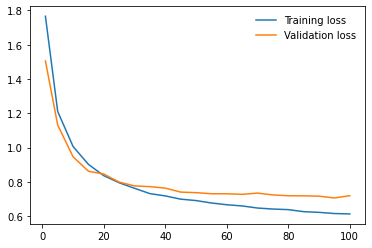

In [9]:
plt.plot(x_axis,train_losses, label='Training loss')
plt.plot(x_axis, dev_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

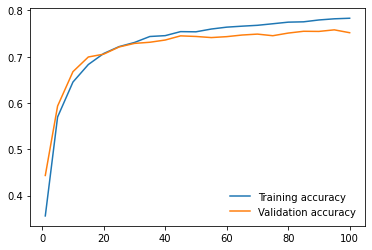

In [10]:
plt.plot(x_axis, train_acc, label="Training accuracy")
plt.plot(x_axis, dev_acc, label="Validation accuracy")
plt.legend(frameon=False)
plt.show()

In [11]:
model.eval()
iter_3 = 0
acc_test = 0
for data_test, target_test in test_loader:
    iter_3 += 1
    test_pred = model(data_test.to("cuda"))
    test_pred = torch.exp(test_pred)
    top_p, top_class_test = test_pred.topk(1, dim=1)
    acc_test += accuracy_score(target_test.to("cpu"), top_class_test.to("cpu"))
print(acc_test/iter_3)

0.7552


## Data Augmentation with imgaug
La classe augmenters dans le package imgaug a des utilitaires utiles pour effectuer ces augmentations. Jetons un coup d'œil aux différents utilitaires présents dans la classe augmenters pour générer des images augmentées à partir d'une image donnée. Certaines des techniques d'augmentation les plus importantes sont les suivantes:

* Transformations affines
* Modifier la luminosité
* Ajouter du bruit

Notez que PyTorch dispose d'un pipeline d'augmentation d'image pratique sous la forme de torchvision.transforms. Cependant, nous avons toujours choisi d'introduire une bibliothèque différente principalement en raison de la plus grande variété d'options qu'imgaug contient, ainsi que de la facilité d'expliquer les augmentations à un nouvel utilisateur. Vous êtes encouragé à rechercher les transformations de la vision de la torche en tant qu'exercice et à recréer toutes les fonctions présentées pour renforcer votre compréhension.

### Affine transformations
Les transformations affines impliquent la translation, la rotation, la mise à l'échelle et le cisaillement d'une image. Elles peuvent être effectuées dans le code à l'aide de la méthode Affine présente dans la classe augmenters. Jetons un œil aux paramètres présents dans la méthode Affine en regardant le code suivant. Ici, nous avons défini tous les paramètres de la méthode Affine.

In [3]:
import imgaug
import imgaug.augmenters as iaa
print(imgaug.__version__)

aug = iaa.Affine(scale=1.0, translate_percent=None, translate_px=None, rotate=0.0, shear=0.0,
                 order=1, cval=0, mode='constant', fit_output=False, backend='auto', name=None, deterministic=False, random_state=None)



0.2.9


Certains des paramètres importants de la méthode Affine sont les suivants

* **scale spécifie** la quantité de zoom qui doit être fait pour l'image
* **translate_percent** spécifie la quantité de translation en pourcentage de la hauteur et de la largeur de l'image

* **translate_px** spécifie la quantité de translation en nombre absolu de pixels

* **rotate** spécifie la quantité de rotation qui doit être effectuée sur l'image

* **shear** spécifie la quantité de rotation qui doit être effectuée sur une partie de l'image

Avant de considérer d'autres paramètres, comprenons où la mise à l'échelle, la translation et la rotation sont utiles.

Récupérer une image aléatoire à partir de l'ensemble de données d'entraînement pour fashionMNIST.

Télécharger des images de l'ensemble de données Fashion-MNIST

In [4]:
from torchvision import datasets
import torch
data_folder = '/content/' # This can be any directory you want to download FMNIST to
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Récupérer une image à partir de l'ensemble de données téléchargé

In [6]:
tr_images = fmnist.data
tr_targets = fmnist.targets

Traçons la première image

Text(0.5, 1.0, 'Original image')

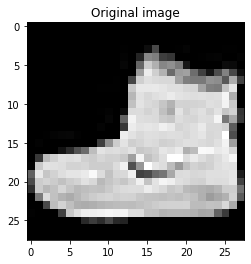

In [9]:
import matplotlib.pyplot as plt
plt.imshow(tr_images[0], cmap='gray')
plt.title('Original image')

Effectuez une mise à l'échelle(scale)[texte du lien](https://) au-dessus de l'image :



In [11]:
def to_numpy(tensor):
    return tensor.cpu().detach().numpy()

Text(0.5, 1.0, 'Scaled image')

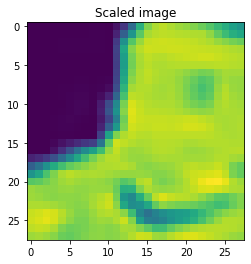

In [12]:
aug = iaa.Affine(scale=2)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])))
plt.title('Scaled image')

Dans la sortie précédente, l'image a été considérablement agrandie. Cela a entraîné la suppression de certains pixels de l'image d'origine car la forme de sortie de l'image n'a pas changé.

Voyons maintenant un scénario dans lequel une image a été translater d'un certain nombre de pixels à l'aide du paramètre translate_px :

Text(0.5, 1.0, 'Translated image by 10 pixels (right and bottom)')

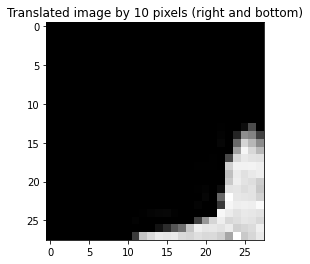

In [13]:
aug = iaa.Affine(translate_px=10)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Translated image by 10 pixels (right and bottom)')

Dans la sortie précédente, la translation de 10 pixels s'est produite sur les deux axes x et y

Si nous voulons effectuer une translation plus dans un axe et moins dans l'autre axe, nous devons spécifier la quantité de translation que nous voulons dans chaque axe

Text(0.5, 1.0, 'Translation of 10 pixels \nacross columns and 2 pixels over rows')

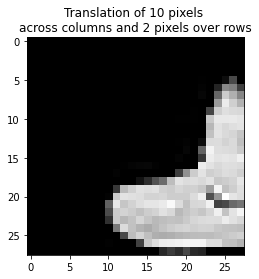

In [14]:
aug = iaa.Affine(translate_px={'x':10,'y':2})
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Translation of 10 pixels \nacross columns and 2 pixels over rows')

Ici, nous avons fourni un dictionnaire qui indique la quantité de traduction dans les axes x ety dans le paramètre translate_px

Text(0.5, 1.0, 'Rotation of image by -30 degrees')

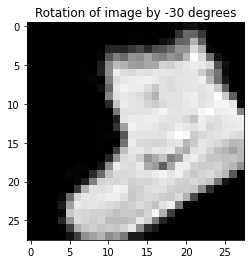

In [15]:

aug = iaa.Affine(rotate=-30)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Rotation of image by -30 degrees')

Text(0.5, 1.0, 'Shear of image by 30 degrees')

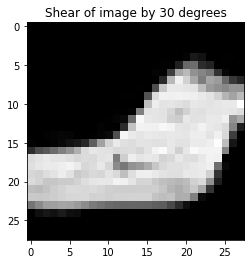

In [16]:
aug = iaa.Affine(shear=30)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Shear of image by 30 degrees')


fit_output est un paramètre qui peut aider avec le scénario précédent. Par défaut, il est défini sur False. Cependant, voyons comment les sorties précédentes varient lorsque nous spécifions fit_output comme True lorsque nous redimensionnons, translatons, faisons pivoter et découpons l'image

Text(0.5, 1.0, 'Shear of image \nby 30 degrees')

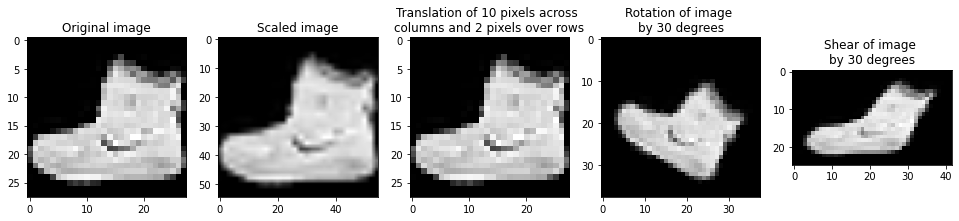

In [20]:

plt.figure(figsize=(20,20))
plt.subplot(161)
plt.imshow(tr_images[0], cmap='gray')
plt.title('Original image')
plt.subplot(162)
aug = iaa.Affine(scale=2, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Scaled image')
plt.subplot(163)
aug = iaa.Affine(translate_px={'x':10,'y':2}, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Translation of 10 pixels across \ncolumns and 2 pixels over rows')
plt.subplot(164)
aug = iaa.Affine(rotate=30, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Rotation of image \nby 30 degrees')
plt.subplot(165)
aug = iaa.Affine(shear=30, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Shear of image \nby 30 degrees')

Ici, nous pouvons voir que l'image d'origine n'a pas été recadrée et que la taille de l'image augmentée a augmenté pour tenir compte du fait que l'image augmentée n'est pas recadrée (dans la sortie de l'image mise à l'échelle ou lors de la rotation de l'image de 30 degrés). De plus, nous pouvons également voir que l'activation du paramètre fit_output a annulé la translatation que nous attendions dans la translatation d'une image de 10 pixels (il s'agit d'un comportement connu, comme expliqué dans la documentation)
















Notez que lorsque la taille de l'image augmentée(par exemple, lorsque l'image est tournée), nous devons déterminer comment les nouveaux pixels qui ne font pas partie de l'image d'origine doivent être remplis.

Le paramètre cval résout ce problème. Il spécifie la valeur de pixel des nouveaux pixels créés lorsque fit_output est True. Dans le code précédent, cval est rempli avec une valeur par défaut de 0, ce qui donne des pixels noirs. Comprenons comment changer le paramètre cval à une valeur de 255 affecte la sortie lorsqu'une image est tournée

Text(0.5, 1.0, 'Rotation of image by 30 degrees')

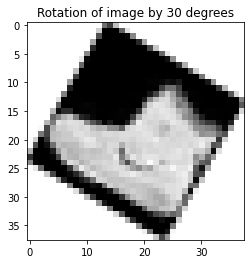

In [19]:
aug = iaa.Affine(rotate=30, fit_output=True, cval=255)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Rotation of image by 30 degrees')

Dans l'image précédente, les nouveaux pixels ont été remplis avec une valeur de pixel de 255, ce qui correspond à la couleur blanche.

De plus, il existe différents modes que nous pouvons utiliser pour remplir les valeurs des pixels nouvellement créés. Ces valeurs, qui concernent le paramètre mode, sont les suivantes :

* **constant** : Pads avec une valeur constante.
* **edge** : Pads avec les valeurs de bord du tableau.
* **symmetric** : pastilles avec la réflexion du vecteur reflétée le long du bord du tableau
* **reflect** : pads avec la réflexion du vecteur reflétée sur les premières et dernières valeurs du vecteur le long de chaque axe.

* **wrap**: Pads avec le wrap du vecteur le long de l'axe.


## Modification de la luminosité

Imaginez un scénario où la différence entre l'arrière-plan et le premier plan n'est pas aussi nette que nous l'avons vu jusqu'à présent. Cela signifie que l'arrière-plan n'a pas une valeur de pixel de 0 et que le premier plan n'a pas une valeur de pixel de 255. Un tel scénario peut généralement se produire lorsque les conditions d'éclairage de l'image sont différentes. Si l'arrière-plan a toujours eu une valeur de pixel de 0 et le premier plan a toujours eu une valeur de pixel de 255 lorsque le modèle a été formé mais que nous prédisons une image qui a une valeur de pixel d'arrière-plan de 20 et une valeur de pixel de premier plan de 220, la prédiction est susceptible d'être incorrect. 

**Multiply** et **Linearcontraste** sont deux techniques d'augmentation différentes qui peuvent être utilisées pour résoudre de tels scénarios.

La méthode Multiply multiplie chaque valeur de pixel par la valeur que nous spécifions. La sortie de la multiplication de chaque valeur de pixel par 0,5 pour l'image que nous avons considérée jusqu'à présent est la suivante:

Text(0.5, 1.0, 'Pixels multiplied by 0.5')

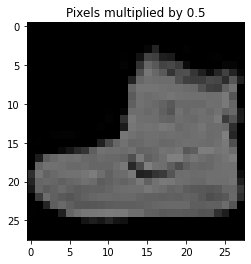

In [21]:
aug = iaa.Multiply(0.5)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray',vmin = 0, vmax = 255)
plt.title('Pixels multiplied by 0.5')

Linearcontrast ajuste chaque valeur de pixel en fonction de la formule suivante:
$$ 127+a*(pixelvalue-127)$$

Dans l'équation précédente, lorsque est $a$ égal à 1, les valeurs de pixels restent inchangées. Cependant, lorsque est inférieur à 1, les valeurs de pixels élevées sont réduites et les valeurs de pixels faibles sont augmentées.

Text(0.5, 1.0, 'Pixel contrast by 0.5')

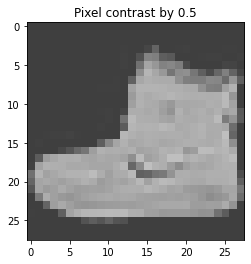

In [22]:
aug = iaa.LinearContrast(0.5)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray',vmin = 0, vmax = 255)
plt.title('Pixel contrast by 0.5')

## Adding noise
Dans un scénario réel, nous pouvons rencontrer des images granuleuses en raison de mauvaises conditions de photographie. Dropout et SaltAndPepper sont deux méthodes importantes qui peuvent aider à simuler des conditions d'image granuleuse. Jetons un coup d'œil à la sortie de l'augmentation d'une image avec ces deux méthodes

Text(0.5, 1.0, 'Random 20% pixel dropout')

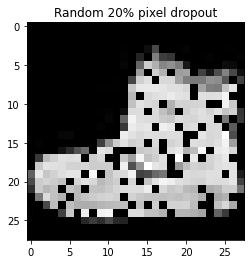

In [23]:

aug = iaa.Dropout(p=0.2)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray',vmin = 0, vmax = 255)
plt.title('Random 20% pixel dropout')

Text(0.5, 1.0, 'Random 20% salt and pepper noise')

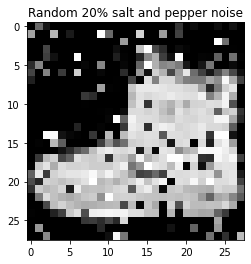

In [24]:
aug = iaa.SaltAndPepper(0.2)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray',vmin = 0, vmax = 255)
plt.title('Random 20% salt and pepper noise')

## Performing a sequence of augmentations

Jusqu'à présent, nous avons examiné diverses augmentations et avons également joué. Cependant, dans un scénario du monde réel, nous devrions prendre en compte autant d'augmentations que possible. Dans cette section, nous allons découvrir la manière séquentielle d'effectuer des augmentations.

En utilisant la méthode séquentielle, nous pouvons construire la méthode d'augmentation en utilisant toutes les augmentations pertinentes qui doivent être effectuées. Pour notre exemple, nous considérerons uniquement la rotation et l'abandon pour augmenter notre image. L'objet séquentiel se présente comme suit.

In [25]:
seq = iaa.Sequential([
      iaa.Dropout(p=0.2,),
    iaa.Affine(rotate=(-30,30))], random_order= True)

Text(0.5, 1.0, 'Image augmented using a \nrandom orderof the two augmentations')

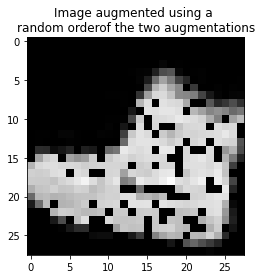

In [26]:
plt.imshow(seq.augment_image(to_numpy(tr_images[0])), cmap='gray',vmin = 0, vmax = 255)
plt.title('Image augmented using a \nrandom orderof the two augmentations')

## Performing data augmentation on a batch ofimages and the need for collate_fn

Nous avons déjà vu qu'il est préférable d'effectuer différentes augmentations dans différentes itérations sur la même image.

Si nous avons un pipeline d'augmentation défini dans la méthode __init__, nous n'aurons besoin d'effectuer une augmentation qu'une seule fois sur l'ensemble d'images d'entrée. Cela signifie que nous n'aurions pas différentes augmentations sur différentes itérations.

De même, si l'augmentation est dans la méthode __getitem__ - ce qui est idéal puisque nous voulons effectuer un ensemble différent d'augmentations sur chaque image - le principal goulot d'étranglement est que l'augmentation est effectuée une fois pour chaque image. Ce serait beaucoup plus rapide si nous devions effectuer une augmentation sur un lot d'images au lieu d'une image à la fois. Comprenons cela en détail en examinant deux scénarios où nous travaillerons sur 32 images.

* Augmentation de 32 images, une à la fois
* Augmentation de 32 images par lot en une seule fois

Cependant, la classe Dataset traditionnelle sur laquelle nous avons travaillé fournit l'index d'une image à la fois dans la méthode __getitem__. Par conséquent, nous devons apprendre à utiliser une nouvelle fonction - collate_fn - qui nous permet d'effectuer des manipulations sur un lot d'images

In [27]:

from imgaug import augmenters as iaa
aug = iaa.Sequential([
    iaa.Affine(translate_px={'x':(-10,10)},
        mode='constant'),
])

In [29]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import numpy as np

class FMNISTDataset(Dataset):
    def __init__(self, x, y, aug=None):
        self.x, self.y = x, y
        self.aug = aug
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]
        return x, y
    def __len__(self): return len(self.x)

    def collate_fn(self, batch):
        'logic to modify a batch of images'
        ims, classes = list(zip(*batch))
        # transform a batch of images at once
        if self.aug: ims=self.aug.augment_images(images=ims)
        ims = torch.tensor(ims)[:,None,:,:].to(device)/255.
        classes = torch.tensor(classes).to(device)
        return ims, classes